This notebook used to visualise busco summary statistic.

In [ ]:
import os
import json
import matplotlib.pyplot as plt

def set_style() -> None:
    """
    Sets the custom styling for all matplotlib plots.
    """
    custom_style = {
        "axes.facecolor": "white",
        "axes.grid": True,
        "grid.alpha": 0.3,
        "axes.titlesize": 10,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 12,
        "lines.linewidth": 1,
        "lines.color": "#8ACE00",
        "figure.figsize": (10, 6),
        "font.family": "Montserrat",
        "font.size": 12,
    }
    plt.rcParams.update(custom_style)

set_style()

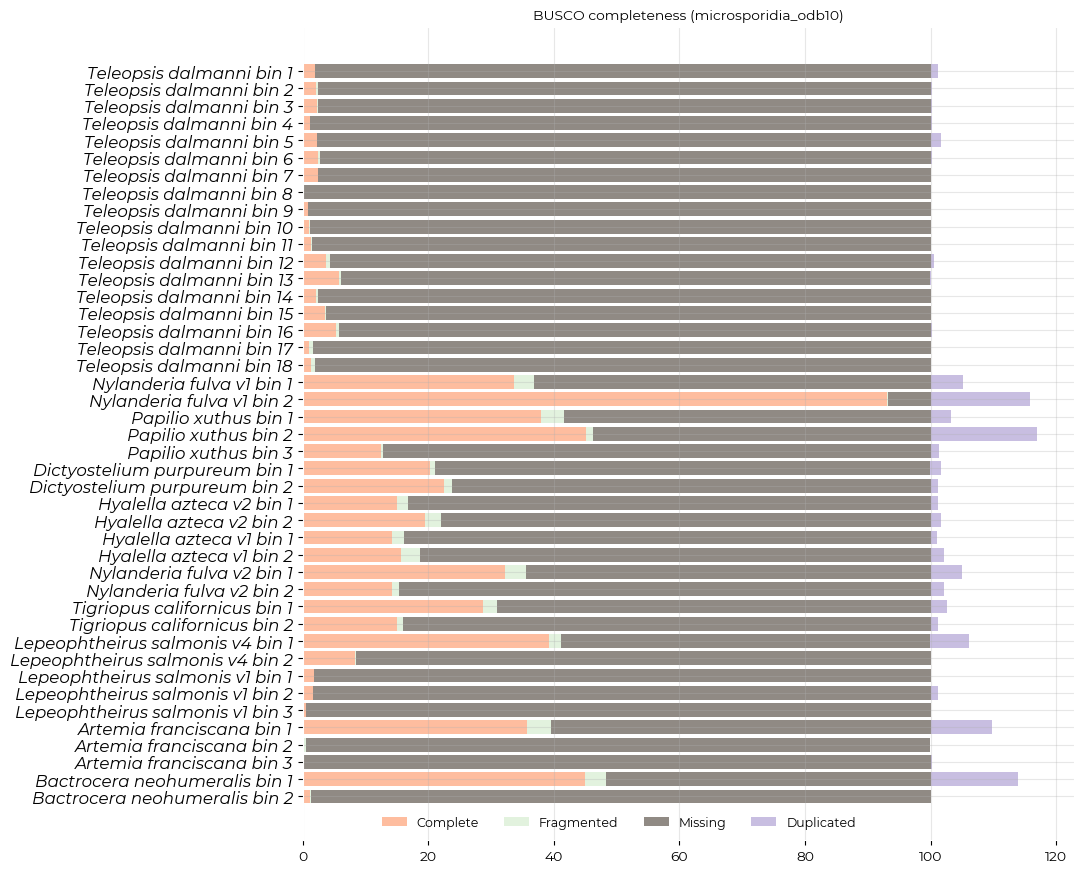

In [ ]:
set_style()

busco_dir = "busco_output"
output_path = "busco_micro_barplot.png"

assembly_labels = {'GCA_001017525.1.001_micro': 'Teleopsis dalmanni bin 1',
                   'GCA_001017525.1.002_micro': 'Teleopsis dalmanni bin 2',
                   'GCA_001017525.1.003_micro': 'Teleopsis dalmanni bin 3',
                   'GCA_001017525.1.004_micro': 'Teleopsis dalmanni bin 4',
                   'GCA_001017525.1.005_micro': 'Teleopsis dalmanni bin 5',
                   'GCA_001017525.1.006_micro': 'Teleopsis dalmanni bin 6',
                   'GCA_001017525.1.007_micro': 'Teleopsis dalmanni bin 7',
                   'GCA_001017525.1.008_micro': 'Teleopsis dalmanni bin 8',
                   'GCA_001017525.1.009_micro': 'Teleopsis dalmanni bin 9',
                   'GCA_001017525.1.010_micro': 'Teleopsis dalmanni bin 10',
                   'GCA_001017525.1.011_micro': 'Teleopsis dalmanni bin 11',
                   'GCA_001017525.1.012_micro': 'Teleopsis dalmanni bin 12',
                   'GCA_001017525.1.013_micro': 'Teleopsis dalmanni bin 13',
                   'GCA_001017525.1.014_micro': 'Teleopsis dalmanni bin 14',
                   'GCA_001017525.1.015_micro': 'Teleopsis dalmanni bin 15',
                   'GCA_001017525.1.016_micro': 'Teleopsis dalmanni bin 16',
                   'GCA_001017525.1.017_micro': 'Teleopsis dalmanni bin 17',
                   'GCA_001017525.1.018_micro': 'Teleopsis dalmanni bin 18',
                   'GCA_005281655.1.001_micro': 'Nylanderia fulva v1 bin 1',
                   'GCA_005281655.1.002_micro': 'Nylanderia fulva v1 bin 2',
                   'GCF_000836235.1.001_micro': 'Papilio xuthus bin 1',
                   'GCF_000836235.1.002_micro': 'Papilio xuthus bin 2',
                   'GCF_000836235.1.003_micro': 'Papilio xuthus bin 3',
                   'GCF_000190715.1.001_micro': 'Dictyostelium purpureum bin 1',
                   'GCF_000190715.1.002_micro': 'Dictyostelium purpureum bin 2',
                   'GCF_000764305.2.001_micro': 'Hyalella azteca v2 bin 1', 
                   'GCF_000764305.2.002_micro': 'Hyalella azteca v2 bin 2',
                   'GCA_000764305.1.001_micro': 'Hyalella azteca v1 bin 1', 
                   'GCA_000764305.1.002_micro': 'Hyalella azteca v1 bin 2',
                   'GCF_005281655.2.001_micro': 'Nylanderia fulva v2 bin 1',
                   'GCF_005281655.2.002_micro': 'Nylanderia fulva v2 bin 2',
                   'GCF_007210705.1.001_micro': 'Tigriopus californicus bin 1', 
                   'GCF_007210705.1.002_micro': 'Tigriopus californicus bin 2',
                   'GCF_016086655.4.001_micro': 'Lepeophtheirus salmonis v4 bin 1', 
                   'GCF_016086655.4.002_micro': 'Lepeophtheirus salmonis v4 bin 2',  
                   'GCA_016086655.1.001_micro': 'Lepeophtheirus salmonis v1 bin 1',
                   'GCA_016086655.1.002_micro': 'Lepeophtheirus salmonis v1 bin 2',
                   'GCA_016086655.1.003_micro': 'Lepeophtheirus salmonis v1 bin 3',
                   'GCF_032884065.1.001_micro': 'Artemia franciscana bin 1', 
                   'GCF_032884065.1.002_micro': 'Artemia franciscana bin 2',
                   'GCF_032884065.1.003_micro': 'Artemia franciscana bin 3',
                   'GCA_024586455.1.001_micro': 'Bactrocera neohumeralis bin 1',
                   'GCA_024586455.1.002_micro': 'Bactrocera neohumeralis bin 2',
                    }

def barplots_busco_summary(busco_dir, assembly_labels, busco_dataset=None):
    busco_data = {}

    for root, _, files in os.walk(busco_dir):
        for fname in files:
            if fname.endswith(".json") and "short_summary" in fname:
                if busco_dataset:
                    if busco_dataset not in fname:
                        continue
                else:
                    parts = fname.split('.')
                    if 'specific' in parts:
                        idx = parts.index('specific')
                        if idx + 1 < len(parts):
                            busco_dataset = parts[idx+1]
                
                path = os.path.join(root, fname)
                label = fname.replace(f"short_summary.specific.{busco_dataset}.", "").replace(".json", "")
                
                possible_keys = [
                    label,
                    label + "_micro",
                    "run_" + label,
                    "run_" + label.replace("_micro", "")
                ]
                
                found_key = None
                for key in possible_keys:
                    if key in assembly_labels:
                        found_key = key
                        break
                
                if not found_key:
                    print(f"Warning: No matching label found for '{label}' in assembly_labels")
                    continue

                try:
                    with open(path) as f:
                        data = json.load(f)
                        result = data["results"]
                        busco_data[found_key] = {
                            "Complete": result["Complete percentage"],
                            "Fragmented": result["Fragmented percentage"],
                            "Missing": result["Missing percentage"],
                            "Duplicated": result["Multi copy percentage"]
                        }
                except Exception as e:
                    print(f"Could not parse {path}: {e}")

    if not busco_data:
        print("No BUSCO results found!")
        return None

    labels_raw = sorted(busco_data.keys(), key=lambda x: list(assembly_labels.keys()).index(x))
    labels = [assembly_labels[label] for label in labels_raw]
    busco_vals = [busco_data[label] for label in labels_raw]

    categories = ["Complete", "Fragmented", "Missing", "Duplicated"]
    colors = ["#febd9f", "#e2f2de", "#908a84", "#c8bee1"]

    fig, ax = plt.subplots(figsize=(11, len(labels) * 0.2 + 0.3))

    for i, cat in enumerate(categories):
        values = [d[cat] for d in busco_vals]
        bottoms = [sum(d[c] for c in categories[:i]) for d in busco_vals] if i > 0 else None
        ax.barh(range(len(labels)), values, left=bottoms, color=colors[i], label=cat)

    title_dataset = busco_dataset if busco_dataset else "BUSCO"
    ax.set_title(f'BUSCO completeness ({title_dataset})',
                size=10,
                loc="center")
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)
    ax.invert_yaxis()

    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    for label in ax.get_yticklabels():
        label.set_fontstyle("italic")

    ax.legend(
        loc="lower center",
        bbox_to_anchor=(0.41, 0),
        ncol=len(categories),
        fontsize=9,
        frameon=False
    )

    plt.tight_layout()
    plt.savefig(output_path, dpi=600)
    plt.show()
    return busco_data

busco_data = barplots_busco_summary(busco_dir, assembly_labels, busco_dataset="microsporidia_odb10")

In [3]:
for key in sorted(busco_data.keys()):
    name = assembly_labels.get(key, key)
    complete = busco_data[key]["Complete"]
    print(f"{name}: {complete:.2f}%")

Hyalella azteca v1 bin 1: 14.20%
Hyalella azteca v1 bin 2: 15.70%
Teleopsis dalmanni bin 1: 2.00%
Teleopsis dalmanni bin 2: 2.20%
Teleopsis dalmanni bin 3: 2.30%
Teleopsis dalmanni bin 4: 1.20%
Teleopsis dalmanni bin 5: 2.30%
Teleopsis dalmanni bin 6: 2.50%
Teleopsis dalmanni bin 7: 2.50%
Teleopsis dalmanni bin 8: 0.30%
Teleopsis dalmanni bin 9: 0.80%
Teleopsis dalmanni bin 10: 1.00%
Teleopsis dalmanni bin 11: 1.30%
Teleopsis dalmanni bin 12: 3.80%
Teleopsis dalmanni bin 13: 5.80%
Teleopsis dalmanni bin 14: 2.20%
Teleopsis dalmanni bin 15: 3.50%
Teleopsis dalmanni bin 16: 5.30%
Teleopsis dalmanni bin 17: 1.00%
Teleopsis dalmanni bin 18: 1.30%
Nylanderia fulva v1 bin 1: 33.70%
Nylanderia fulva v1 bin 2: 93.00%
Lepeophtheirus salmonis v1 bin 1: 1.80%
Lepeophtheirus salmonis v1 bin 2: 1.70%
Lepeophtheirus salmonis v1 bin 3: 0.50%
Bactrocera neohumeralis bin 1: 45.00%
Bactrocera neohumeralis bin 2: 1.20%
Dictyostelium purpureum bin 1: 20.30%
Dictyostelium purpureum bin 2: 22.50%
Hyalella a

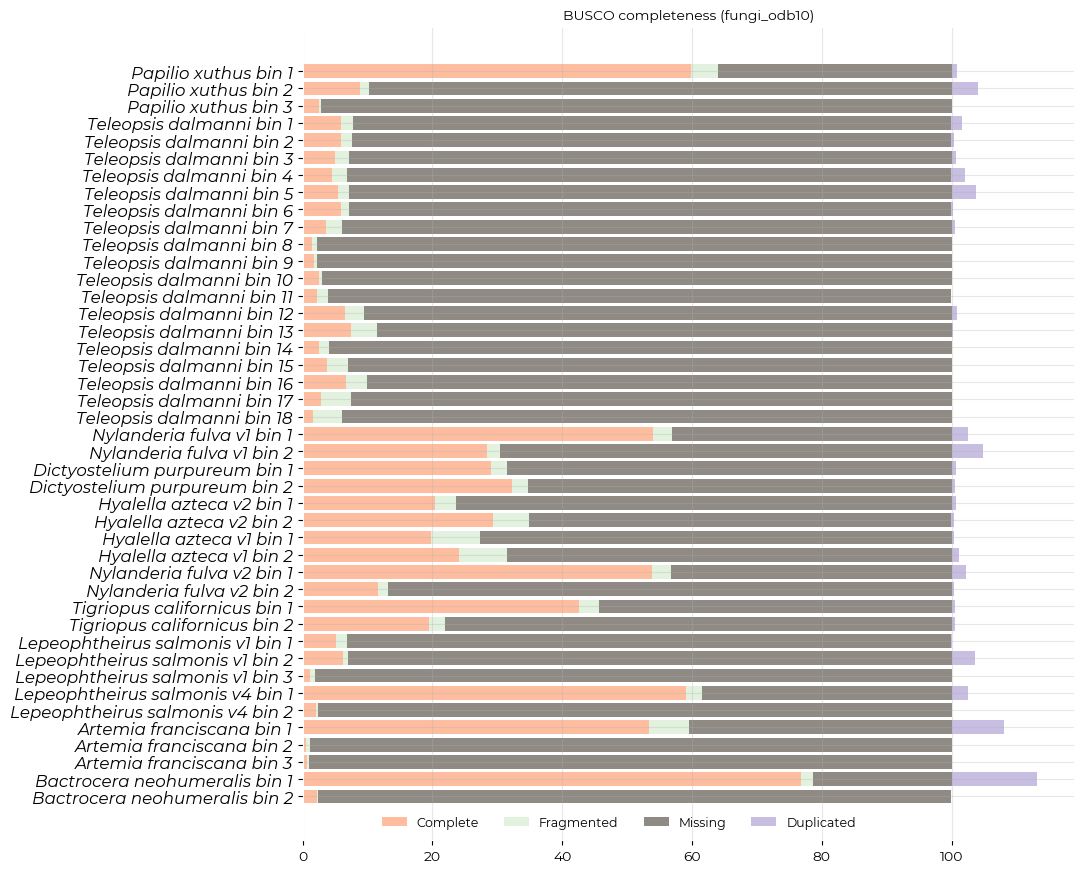

In [4]:
busco_dir = "busco_output"
output_path = "busco_fungi_barplot.png"

assembly_labels = {'run_GCF_000836235.1.001': 'Papilio xuthus bin 1',
                   'run_GCF_000836235.1.002': 'Papilio xuthus bin 2',
                   'run_GCF_000836235.1.003': 'Papilio xuthus bin 3',
                   'run_GCA_001017525.1.001': 'Teleopsis dalmanni bin 1',
                   'run_GCA_001017525.1.002': 'Teleopsis dalmanni bin 2',
                   'run_GCA_001017525.1.003': 'Teleopsis dalmanni bin 3',
                   'run_GCA_001017525.1.004': 'Teleopsis dalmanni bin 4',
                   'run_GCA_001017525.1.005': 'Teleopsis dalmanni bin 5',
                   'run_GCA_001017525.1.006': 'Teleopsis dalmanni bin 6',
                   'run_GCA_001017525.1.007': 'Teleopsis dalmanni bin 7',
                   'run_GCA_001017525.1.008': 'Teleopsis dalmanni bin 8',
                   'run_GCA_001017525.1.009': 'Teleopsis dalmanni bin 9',
                   'run_GCA_001017525.1.010': 'Teleopsis dalmanni bin 10',
                   'run_GCA_001017525.1.011': 'Teleopsis dalmanni bin 11',
                   'run_GCA_001017525.1.012': 'Teleopsis dalmanni bin 12',
                   'run_GCA_001017525.1.013': 'Teleopsis dalmanni bin 13',
                   'run_GCA_001017525.1.014': 'Teleopsis dalmanni bin 14',
                   'run_GCA_001017525.1.015': 'Teleopsis dalmanni bin 15',
                   'run_GCA_001017525.1.016': 'Teleopsis dalmanni bin 16',
                   'run_GCA_001017525.1.017': 'Teleopsis dalmanni bin 17',
                   'run_GCA_001017525.1.018': 'Teleopsis dalmanni bin 18',
                   'run_GCA_005281655.1.001': 'Nylanderia fulva v1 bin 1',
                   'run_GCA_005281655.1.002': 'Nylanderia fulva v1 bin 2',
                   'run_GCA_005281655.1.003': 'Nylanderia fulva v1 bin 3',
                   'run_GCF_000190715.1.001': 'Dictyostelium purpureum bin 1',
                   'run_GCF_000190715.1.002': 'Dictyostelium purpureum bin 2',
                   'run_GCF_000764305.2.001': 'Hyalella azteca v2 bin 1', 
                   'run_GCF_000764305.2.002': 'Hyalella azteca v2 bin 2',
                   'run_GCA_000764305.1.001': 'Hyalella azteca v1 bin 1', 
                   'run_GCA_000764305.1.002': 'Hyalella azteca v1 bin 2',
                    'run_GCF_005281655.2.001': 'Nylanderia fulva v2 bin 1',
                    'run_GCF_005281655.2.002': 'Nylanderia fulva v2 bin 2',
                    'run_GCF_007210705.1.001': 'Tigriopus californicus bin 1', 
                    'run_GCF_007210705.1.002': 'Tigriopus californicus bin 2',
                    'run_GCA_016086655.1.001': 'Lepeophtheirus salmonis v1 bin 1',
                    'run_GCA_016086655.1.002': 'Lepeophtheirus salmonis v1 bin 2',
                    'run_GCA_016086655.1.003': 'Lepeophtheirus salmonis v1 bin 3',
                    'run_GCF_016086655.4.001': 'Lepeophtheirus salmonis v4 bin 1', 
                    'run_GCF_016086655.4.002': 'Lepeophtheirus salmonis v4 bin 2',  
                    'run_GCF_032884065.1.001': 'Artemia franciscana bin 1', 
                    'run_GCF_032884065.1.002': 'Artemia franciscana bin 2',
                    'run_GCF_032884065.1.003': 'Artemia franciscana bin 3',
                    'run_GCA_024586455.1.001': 'Bactrocera neohumeralis bin 1',
                    'run_GCA_024586455.1.002': 'Bactrocera neohumeralis bin 2',
                    }

busco_data = barplots_busco_summary(busco_dir, assembly_labels, busco_dataset="fungi_odb10")

In [5]:
for key in sorted(busco_data.keys()):
    name = assembly_labels.get(key, key)
    complete = busco_data[key]["Complete"]
    print(f"{name}: {complete:.2f}%")

Hyalella azteca v1 bin 1: 19.80%
Hyalella azteca v1 bin 2: 24.10%
Teleopsis dalmanni bin 1: 5.90%
Teleopsis dalmanni bin 2: 5.90%
Teleopsis dalmanni bin 3: 5.00%
Teleopsis dalmanni bin 4: 4.60%
Teleopsis dalmanni bin 5: 5.40%
Teleopsis dalmanni bin 6: 5.90%
Teleopsis dalmanni bin 7: 3.60%
Teleopsis dalmanni bin 8: 1.50%
Teleopsis dalmanni bin 9: 1.80%
Teleopsis dalmanni bin 10: 2.50%
Teleopsis dalmanni bin 11: 2.20%
Teleopsis dalmanni bin 12: 6.50%
Teleopsis dalmanni bin 13: 7.40%
Teleopsis dalmanni bin 14: 2.50%
Teleopsis dalmanni bin 15: 3.80%
Teleopsis dalmanni bin 16: 6.70%
Teleopsis dalmanni bin 17: 2.90%
Teleopsis dalmanni bin 18: 1.60%
Nylanderia fulva v1 bin 1: 54.00%
Nylanderia fulva v1 bin 2: 28.40%
Lepeophtheirus salmonis v1 bin 1: 5.10%
Lepeophtheirus salmonis v1 bin 2: 6.20%
Lepeophtheirus salmonis v1 bin 3: 1.10%
Bactrocera neohumeralis bin 1: 76.80%
Bactrocera neohumeralis bin 2: 2.20%
Dictyostelium purpureum bin 1: 29.00%
Dictyostelium purpureum bin 2: 32.20%
Hyalella a